In [19]:
from model import *
import matplotlib.pyplot as plt

## Feature Importance

In [17]:
pkl_load = load_model('model/model_gb_brf_21667933542.pkl')
features = pkl_load['features']
model = pkl_load['model']
fi = model.feature_importances_
df_fi = pd.DataFrame(fi, columns = ['imp'])
df_fi['features'] = features
df_sort = df_fi.sort_values(by = 'imp', ascending = False)

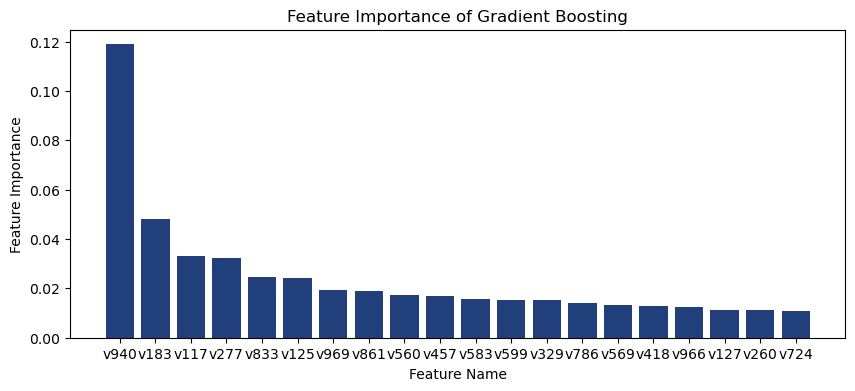

In [23]:
plt.figure(figsize = (10, 4))
plt.bar(df_sort['features'][:20], df_sort['imp'][:20], color = '#213f7b')
plt.title('Feature Importance of Gradient Boosting')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.savefig('fig/gb_fi.png', transparent = True, bbox_inches = 'tight')
plt.show()

In [24]:
pkl_load = load_model('model/model_brf_brf1667947328.pkl')
features = pkl_load['features']
model = pkl_load['model']
fi = model.feature_importances_
df_fi = pd.DataFrame(fi, columns = ['imp'])
df_fi['features'] = features
df_sort = df_fi.sort_values(by = 'imp', ascending = False)

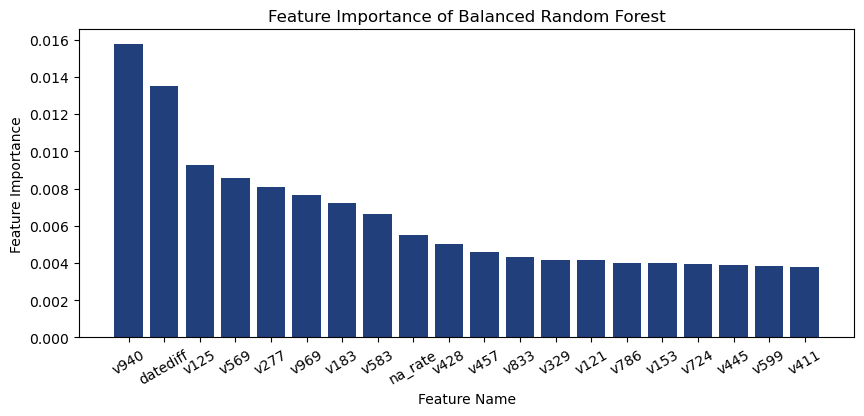

In [27]:
plt.figure(figsize = (10, 4))
plt.bar(df_sort['features'][:20], df_sort['imp'][:20], color = '#213f7b')
plt.title('Feature Importance of Balanced Random Forest')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.xticks(rotation=30)
plt.savefig('fig/brf_fi.png', transparent = True, bbox_inches = 'tight')
plt.show()

## Speed

In [34]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [41]:
loaded_model = load_model('model/model_gb_brf_21667933542.pkl')
model = loaded_model['model']
features = loaded_model['features']
scaler = loaded_model['scaler']
fillm = loaded_model['fillm']

test_data = pd.read_csv('../data/test/feature.csv', index_col = 0)
test_label = pd.read_csv('../data/test/label.csv', index_col = 0)
data_cnt = np.arange(100, len(test_data)+1, 100)
time_list = []
for i in tqdm(data_cnt):
    start = time.time()
    test_temp = test_data.iloc[:i, :]
    test_temp_l = test_label.iloc[:i, :]
    test_temp = na_rate(test_temp)
    test_temp, test_temp_l = datediff(test_temp, test_temp_l)

    test_scale = pd.DataFrame(scaler.transform(test_temp), columns = test_temp.columns)
    test_fillna, _ = fillna_method(test_scale, method = fillm)

    X_test_select = test_fillna[features]
    test_score = model.predict_proba(X_test_select)
    end = time.time()
    time_list.append(end-start)


100%|██████████| 245/245 [02:52<00:00,  1.42it/s]


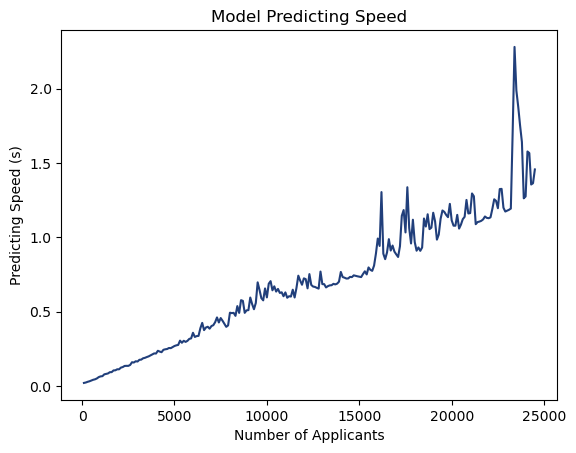

In [45]:
plt.figure()
plt.plot(data_cnt, time_list, color = '#213f7b')
plt.xlabel('Number of Applicants')
plt.ylabel('Predicting Speed (s)')
plt.title('Model Predicting Speed')
plt.savefig('fig/speed.png', transparent = True, bbox_inches = 'tight')
plt.show()

## ROC Curve

<Figure size 640x480 with 0 Axes>

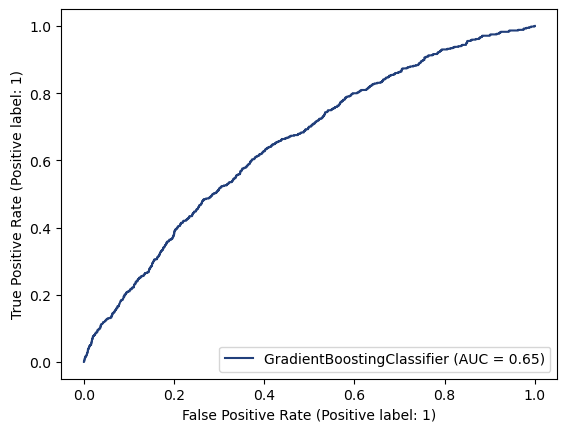

In [48]:
loaded_model = load_model('model/' + 'model_gb_brf_21667933542' + '.pkl')
model = loaded_model['model']
features = loaded_model['features']
scaler = loaded_model['scaler']
fillm = loaded_model['fillm']

X_test, Y_test = eval_prep(scaler, fillm)
X_test_select = X_test[features]
test_score = model.predict_proba(X_test_select)
plt.figure()
plot_roc_curve(model, X_test_select, Y_test['DEFAULT_LABEL'], color = '#213f7b')
plt.savefig('fig/roc.png', transparent = True, bbox_inches = 'tight')
plt.show()